# 230968340
## Week 3
### Exercise 1

### 1. Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [226]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [228]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [229]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2. Compute mean & standard deviation, tabulate and visualize the age of the patients.

In [230]:
age_mean = np.mean(df['Age'])
age_stddev = np.std(df['Age'])
print(f"Mean is {age_mean} and standard deviation is {age_stddev}")

Mean is 33.240885416666664 and standard deviation is 11.752572645994178


In [231]:
df['Age'].value_counts()


22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

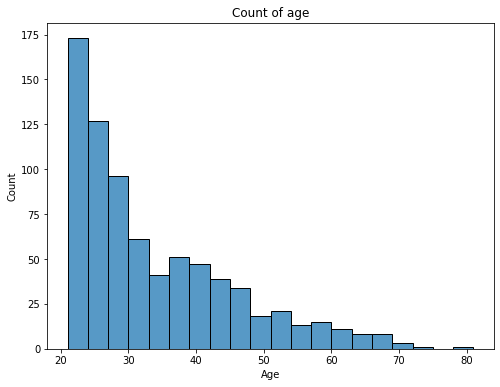

In [232]:
plt.figure(figsize=(8,6))
sns.histplot(data = df, x = 'Age', bins = 20)
plt.title("Count of age")
plt.show()

### 3. Analyze and tabulate the relationship of age, BMI of patients with respect to the class. 

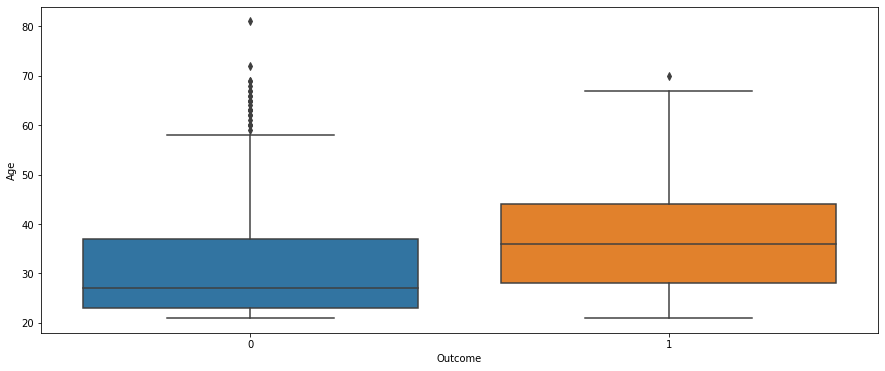

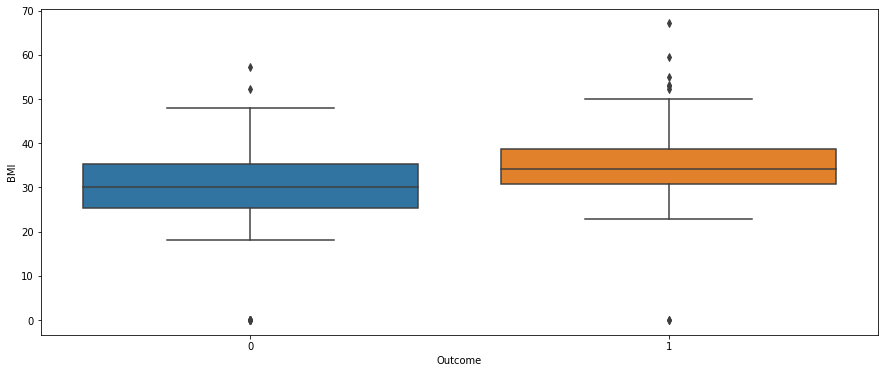

In [233]:
plt.figure(figsize=(15,6))

sns.boxplot(data = df, x = 'Outcome', y = 'Age')


plt.show()

plt.figure(figsize=(15,6))
sns.boxplot(data = df, x = 'Outcome', y = 'BMI')
plt.show()


### 4. Tabulate the class label and comment on whether the classes are balanced. 

In [234]:
df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


Not balanced

### 5. Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, consensus_score

In [257]:
df = df.astype(float)

In [258]:
X = df.drop('Outcome', axis=1) 
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [259]:
y_pred = model.predict(X_test)

In [260]:
accuracy_score(y_test, y_pred)

0.7359307359307359

### 6. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map. 

In [261]:
matrix = confusion_matrix(y_test, y_pred)

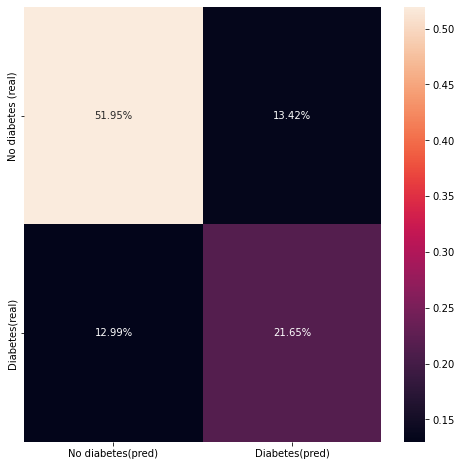

In [274]:
plt.figure(figsize=(8,8))

sns.heatmap(matrix/np.sum(matrix), annot = True, fmt = '0.2%', xticklabels=['No diabetes(pred)','Diabetes(pred)'], yticklabels=['No diabetes (real)','Diabetes(real)'])

plt.show()

### 7. Compute accuracy rate, true positive and true negative rate and comment on the performance. 

In [275]:
matrix

array([[120,  31],
       [ 30,  50]], dtype=int64)

In [278]:
True_positive_rate = (matrix[0][0]/(matrix[0][0] + matrix[1][1]))*100
print(f"True positive is {True_positive_rate}")

True positive is 70.58823529411765


In [279]:
True_negative_rate = (matrix[1][1]/(matrix[0][0] + matrix[1][1]))*100
print(f"True positive is {True_negative_rate}")

True positive is 29.411764705882355


### 8. Visualize the ROC curve, and comment on the performance of the classifier.

In [287]:
from sklearn.metrics import roc_curve, auc


In [293]:
fpr, tpr, thresh = roc_curve(y_test,model.predict_proba(X_test)[:,1])

auc_score = auc(fpr, tpr)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


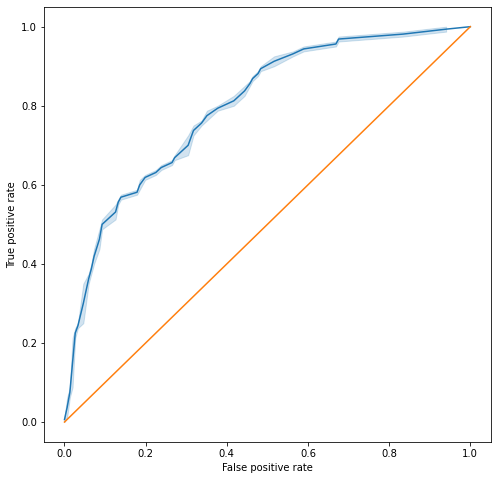

In [297]:
plt.figure(figsize=(8,8))

sns.lineplot(fpr, tpr)
sns.lineplot([0,1],[0,1])

plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()